In [52]:
import pandas as pd
from math import sin, cos, sqrt, atan2, radians
import shapely
import geopandas as gpd
import fiona
import numpy as np
import os
import datetime
import matplotlib
import glob
import re
import matplotlib.pyplot as plt
from functools import reduce
import time
import sys
from heapq import nsmallest
%matplotlib inline

In [53]:
def calculate_distance(lat1,lon1,lat2,lon2):
    # approximate radius of earth in km
    R = 6373.0
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

In [54]:
Region_list = ['CA','TX','NewEngland','MA']
region_id = 2 #0,1,2,3

df_data = pd.read_csv('Outputs/Match_WS/Result_ZIPmatchWS_' + Region_list[region_id] + '.csv')

In [55]:
Distance_list = []
Label_same_state = []
Label_same_eGRID = []

for i in range(len(df_data)):

    lat1 = df_data.loc[i]['LAT']
    lon1 = df_data.loc[i]['LON']
    lat2 = df_data.loc[i]['WS_LAT']
    lon2 = df_data.loc[i]['WS_LON']
    Distance = calculate_distance(lat1,lon1,lat2,lon2)
    Distance_list.append(Distance)
    if df_data.loc[i]['SITE_STATE'] == df_data.loc[i]['WS_state']:
        Label_same_state.append(1)
    else:
        Label_same_state.append(0)
        
    if df_data.loc[i]['eGRID Region_assigned'] == df_data.loc[i]['WS_eGRID']:
        Label_same_eGRID.append(1)
    else:
        Label_same_eGRID.append(0)        
    
df_data['Distance'] = Distance_list
df_data['Same_state'] = Label_same_state
df_data['Same_eGRID'] = Label_same_eGRID

In [56]:
print('For the '+ Region_list[region_id] +', there are ' +str(len(Label_same_eGRID))+' unique zip codes')
print('          '+str(sum(Label_same_state))+' of them can find the weather station at same eGRID area')
print('          '+str(len(Label_same_eGRID) - sum(Label_same_state))+' of them cannot find the weather station at same eGRID area') 

For the NewEngland, there are 1881 unique zip codes
          1008 of them can find the weather station at same eGRID area
          873 of them cannot find the weather station at same eGRID area


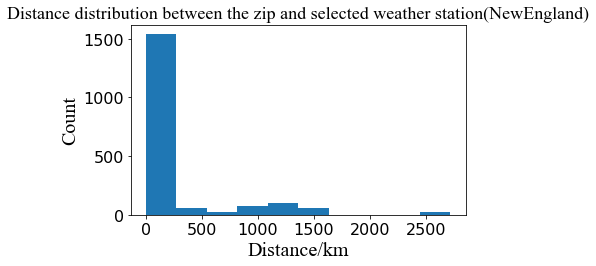

In [57]:
font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 18,
}

font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 20,
}

figsize = 6,3.5
figure, ax = plt.subplots(figsize=figsize)

plt.hist(Distance_list)

title_name = 'Distance distribution between the zip and selected weather station('+Region_list[region_id]+')'
plt.tick_params(labelsize=16)
plt.title(title_name,font1)
plt.xlabel('Distance/km',font2)
plt.ylabel('Count',font2)
plt.show()

In [58]:
zip_WS_list = df_data['Nearestweatherstationid_sameIECC(From_NREL city list)'].tolist()

In [59]:
NREL_city = pd.read_csv('Inputs/ResStock 2012 AMYs (splited_mapped_IECC_eGRID).csv')

In [60]:
count = 0
nrel_city_list = NREL_city['ID1']
for i in range(len(nrel_city_list)):
    if nrel_city_list[i] in zip_WS_list:
        count = count+1
        

In [61]:
count

17